In [1]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree.

In [2]:
from src import LTVSyntheticData
from src import LTVexploratory

### Generate synthetic data 

In [3]:
synth_data_gen = LTVSyntheticData(n_users=20000, random_seed=42)
customer_table = synth_data_gen.get_customers_data()
event_table = synth_data_gen.get_events_data()

# Call the exploratory class
da = LTVexploratory(
    customer_table, 
    event_table,
    registration_time_col='registration_date',
    event_time_col='event_date',
    event_name_col='event_name',
    value_col='value'
    )

In [4]:
customer_table.head()

,UUID,registration_event_name,country,device,download_method,registration_date
0,1.0,first_app_open,IN,android,wifi,2020-01-02
1,2.0,first_app_open,BR,android,wifi,2022-06-27
2,3.0,first_app_open,ES,ios,wifi,2020-05-08
3,4.0,first_app_open,IN,ios,wifi,2022-03-15
4,5.0,first_app_open,US,android,mobile_data,2020-01-19


In [5]:
event_table.head()

,UUID,event_date,days_since_registration,event_name,value
17,12.0,2022-04-13,17,purchase,1.580250
25,12.0,2022-04-21,25,purchase,154.465789
296,27.0,2021-05-22,16,purchase,1.038395
887,71.0,2022-12-21,2,purchase,2.319024
895,71.0,2022-12-29,10,purchase,4.218515


### Run analysis

<Axes: >

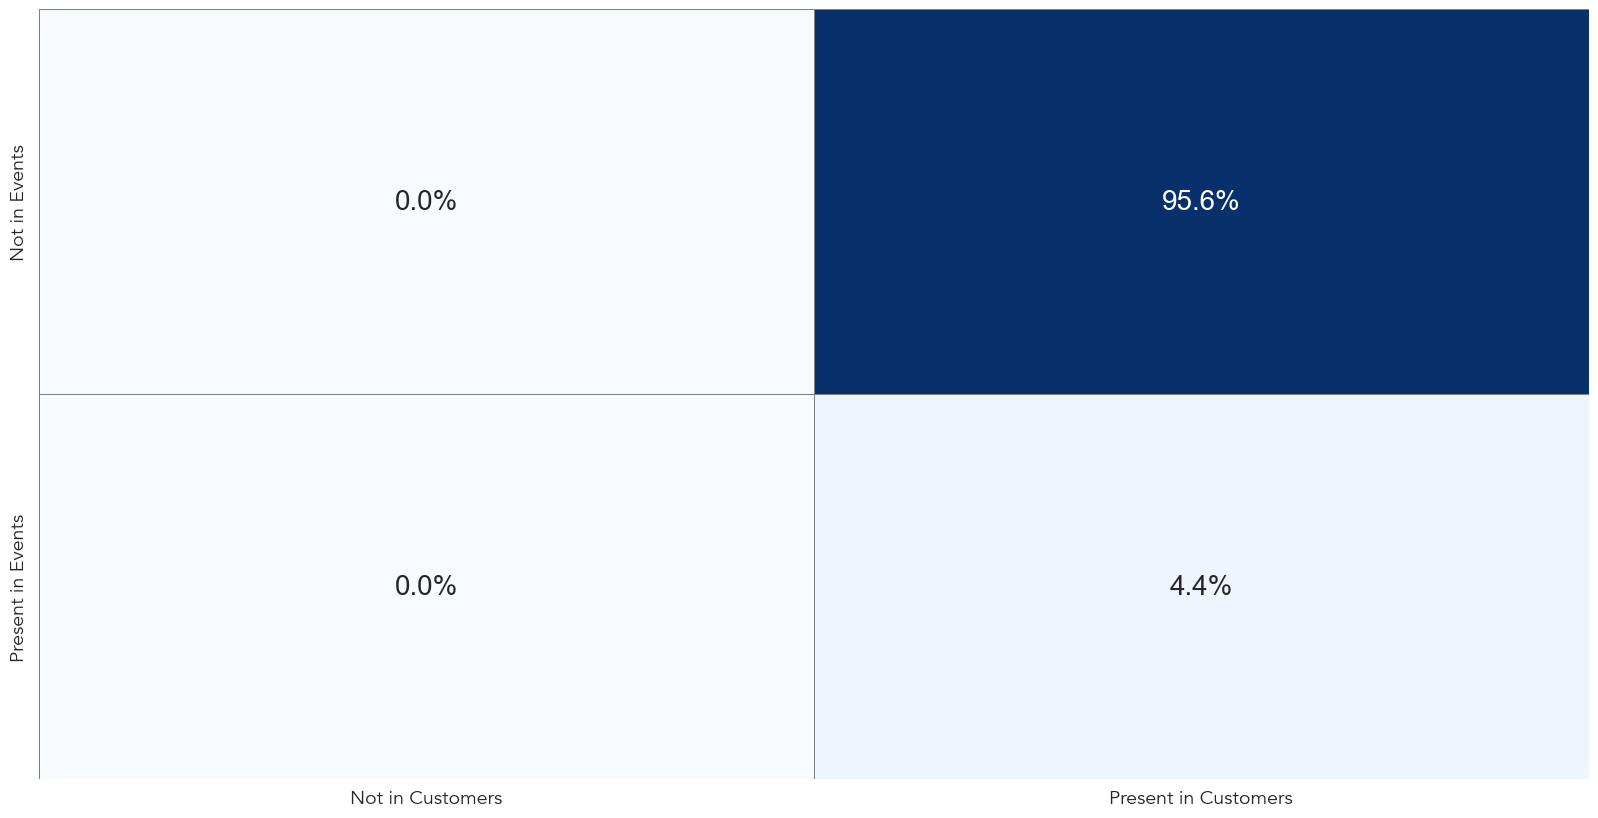

In [6]:
fig, data = da.plot_customers_intersection()
fig

In [7]:
fig, data = da.plot_paying_customers_flow(days_limit=60, early_limit=7, spending_breaks={'No spend': 0, 'Low spend': 10, 'Medium spend': 100, 'High spend': 99999})
fig

In [8]:
data

,early_class,late_class,customers,early_revenue,early_ltv,median_early_ltv,late_revenue,late_ltv,median_late_ltv
0,No spend,Low spend,0.348039,0.000000,0.000000,0.000000,951.074351,3.348853,2.666990
1,No spend,Medium spend,0.090686,0.000000,0.000000,0.000000,1825.051031,24.662852,18.172717
2,No spend,High spend,0.009804,0.000000,0.000000,0.000000,8198.808539,1024.851067,194.505889
3,Low spend,Low spend,0.372549,849.795152,2.795379,2.140636,1285.078438,4.227232,3.767594
4,Low spend,High spend,0.006127,15.128123,3.025625,1.625315,1987.212845,397.442569,159.734481
5,Low spend,Medium spend,0.122549,365.868441,3.658684,3.148767,2331.159020,23.311590,17.002057
6,Medium spend,Medium spend,0.049020,840.753323,21.018833,16.189444,1000.463269,25.011582,19.742943
7,High spend,High spend,0.001225,223.695245,223.695245,223.695245,226.943601,226.943601,226.943601


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:214: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:219: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



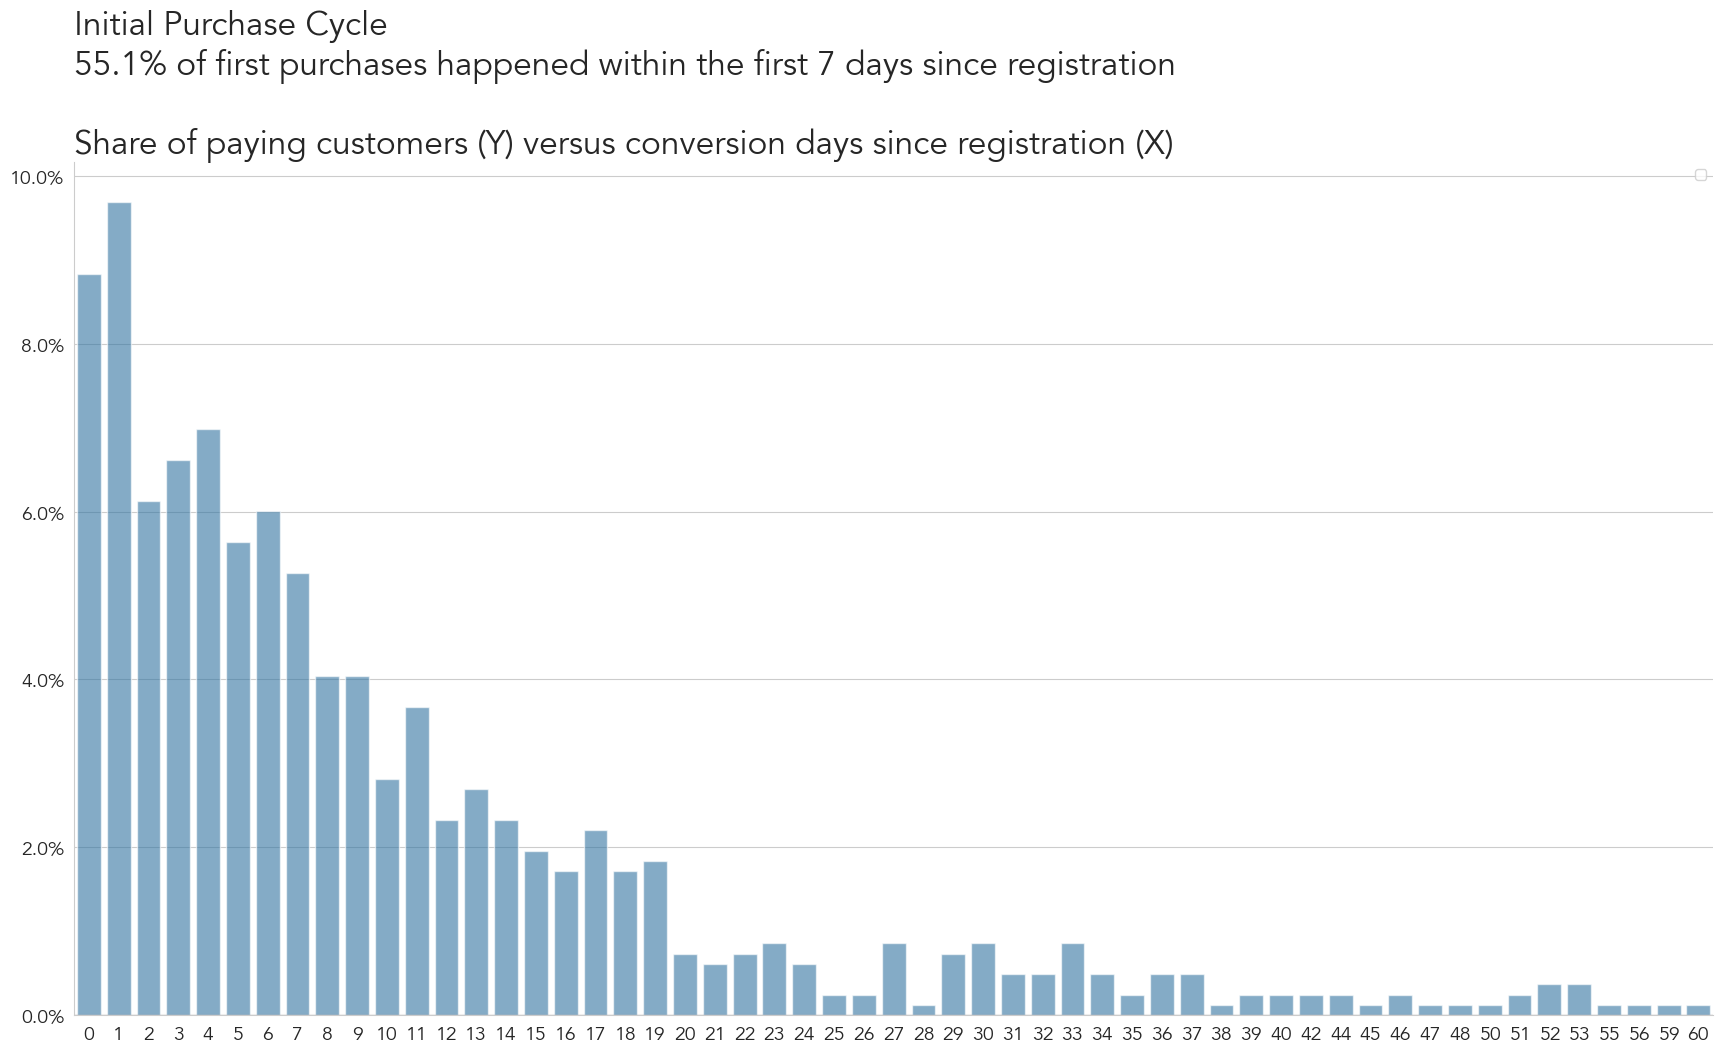

In [9]:
fig, data = da.plot_customers_histogram_per_conversion_day(days_limit=60)
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:214: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/raphaeltamaki/Documents/git/LTVision/src/graph.py:219: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



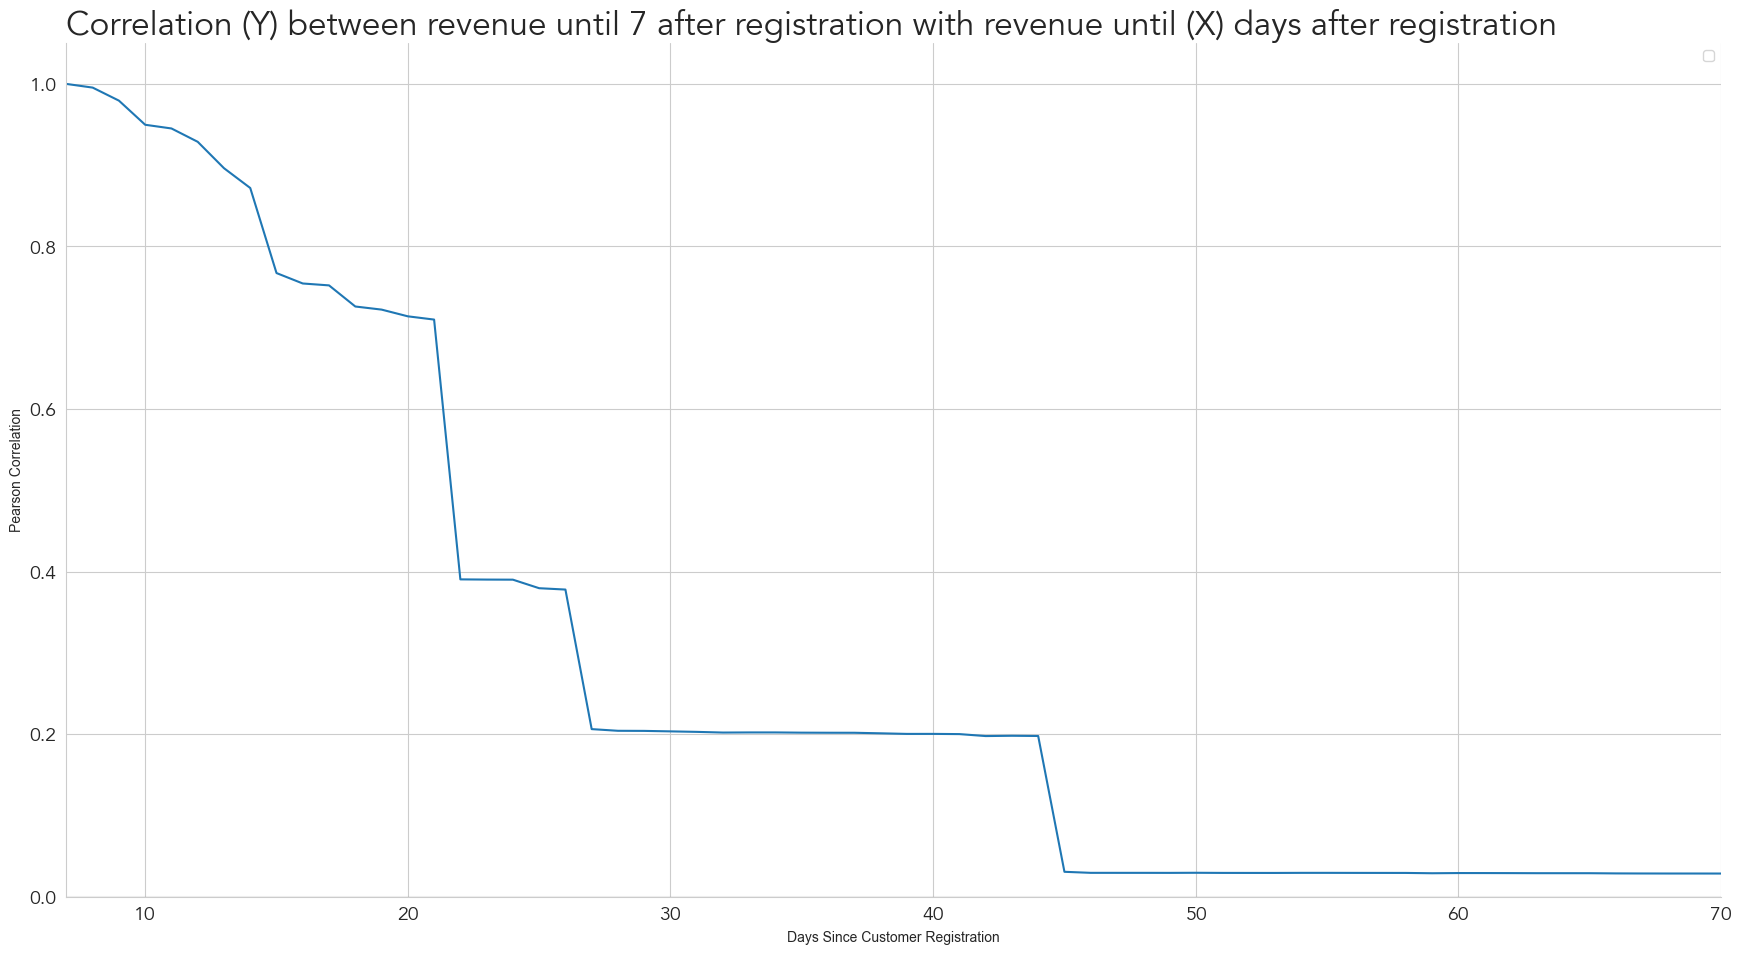

In [10]:
fig, data = da.plot_early_late_revenue_correlation(days_limit=70)
fig